What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

My data set looks at all of the people who have been accepted to the Data Science program since the creation of Hen at Thinkful. It is valuable Data from which we can pull our Average close rate, how long on average it takes people to enorll and how many admissions counselors people interacted with before signing up. Because this is the last stop in the Admissions process we are given the chance to see what is working and what is not. This also, allows us to reverse engineer how many people we need at the top of the funnel to move down to the bottom of the funnel, since we will have a good estimate of how many people we close and generally how long it takes to close them.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
%matplotlib inline

df = pd.read_csv('sales_data.csv')
print (df)

df['How much help'].values

                  Name                             Email  Signed up  \
0         Mark Goldfarb          markcgoldfarb@gmail.com          1   
1           Farouk Rice               faroukjr@gmail.com          1   
2    Francisco Silverio           silveriofr@hotmail.com          0   
3    David Antzelevitch     david.antzelevitch@gmail.com          1   
4          Nadia Morgen            usability42@gmail.com          1   
5       Omid Naghshineh           mrnaghshineh@gmail.com          1   
6               Shu Cui              shu.cui17@gmail.com          0   
7     Branden Shimamoto       brandenshimamoto@gmail.com          0   
8        Aakrati Mathur          mathuraakrati@gmail.com          0   
9       Hellen Wainaina          hellenwambui7@gmail.com          0   
10    Bernard Tumanjong            tumanjongbt@gmail.com          1   
11           David Kang          david.kang714@gmail.com          0   
12     Jennifer Killian     ms.jenniferkillian@gmail.com          0   
13    

array([2, 1, 1, 3, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0,
       3, 0, 0, 0, 0, 1, 1, 3, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 3])

Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

1) What is average close rate of students who are accepted in the program?
2) How long does it typically take for students to sign up?
3) What is the distribution of how many different employees from Thinkful that students interact with?

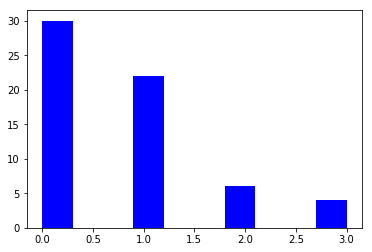

In [7]:
plt.hist(df['How much help'].values, color='blue')
plt.show()

This graph shows us the grouping of how many students have talked with different Admissions Counselor. Zero, tells us that the student only talked one Admissions Counselor, 1 means that that they talked to two Counselors and so on and so forth.

This tells us that the majority of students have only talked to one or two admissions couselor. This makes sense, given our new strucutre and specialization. What would be interesting to explore here would be the close rates of grouping. In other words we could use probability to determine if it increases or decreases the chances of a student enrolling when they have more interaction with Admissions counselor.

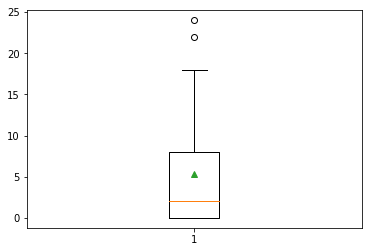

5.310344827586207

In [16]:
close_date = df['Days to Close'].dropna()
plt.boxplot(close_date, showmeans=True)
plt.show()
np.mean(close_date)

The graph tells quite an interesting story, while the mean closing date (meaning how long it takes someone to enroll from when they get the email that allows them to) is around 5 days, most people enroll about 9-10 days. The outliers definitely throw things off and higher our average close date. 

The Conclusion I think that we can pull from this graph is that we should expect people to enroll in the course about 10 days after they are given the link.

In [17]:
np.std(close_date)

6.848626584067092

The standard deviation with the close date tells a pretty deceptive story. Looking at the number one might assume that there is no real realiable way to determine when one might close. If the numbers for close date happen to be about 7 days apart, how can we really determine when someone will close or not, 7 days is a week apart? The answer is the extrmely high outliers of about 27, 25 days. That really throws off the standard deviation. I believe the graph above is a better story of how long it might take someone to close.

3.Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.

I really want to explore if talking to more Thinful employees increases the win-probability for students. This would be a valuable insight that could inform our team structure. If it does increase win probability we should structure the team in such a way as to make sure that students talk to as many employees as possible. If it does not, we can either keep the team the same or make sure that students only talk with one person. 

I could almost calculate this now. First, I would calculate the win probaility of students who either talked with one person, two people and three plus people. I could then compare those win proabilities against one another. However, I am sure that I could write and algorithm that would calculate this a lot easier. As I progress through the course, I hope to be able to do that.